In [0]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [0]:
features = np.loadtxt('./features.txt', delimiter = ',')
target = np.loadtxt('./target.txt', delimiter = ',')

In [0]:
def cost_func(w, b, features, target, C = 100):
  loss = 0.5 * np.sum(w ** 2) + C * np.sum(np.maximum(0, 1 - target * (w @ features.T + b)))
  return loss

In [5]:
#Batch Gradient Descent
w = np.zeros(122)
b = 0
C = 100
lr = 0.0000003
epsilon = 0.25
delta_percent_cost = 1e8
BGD_cost = []
BGD_iterations = 0
start_time = time.time()

while delta_percent_cost >= epsilon:
  BGD_cost.append(cost_func(w, b, features, target, C))
  w_tmp = w.copy()
  b_tmp = b
  for j in range(len(w)):
    delta_w_j = w[j]
    for i in range(features.shape[0]):
      if target[i] * (features[i] @ w + b) < 1:
        delta_w_j += C * (-target[i] * features[i, j])
    w_tmp[j] -= lr * delta_w_j

  delta_b = 0
  for i in range(features.shape[0]):
    if target[i] * (features[i] @ w + b) < 1:
      delta_b += C * (-target[i])
  b_tmp -= lr * delta_b

  w = w_tmp.copy()
  b = b_tmp

  BGD_iterations += 1
  delta_percent_cost = np.abs(BGD_cost[-1] - cost_func(w, b, features, target, C)) * 100 / BGD_cost[-1]
  if delta_percent_cost < epsilon:
    end_time = time.time()
    BGD_cost.append(cost_func(w, b, features, target, C))

print("Batch Gradient Descent takes {} seconds".format(end_time - start_time))

Batch Gradient Descent takes 156.50093269348145 seconds


In [6]:
#Stochastic Gradient Descent
w = np.zeros(122)
b = 0
C = 100
lr = 0.0001
epsilon = 0.001
delta_cost = 0
SGD_cost = []
SGD_iterations = 0
permutation = np.random.permutation(features.shape[0])#For randomly shuffle
SGD_features = features[permutation]
SGD_target = target[permutation]
i = 0
start_time = time.time()


while True:
  SGD_cost.append(cost_func(w = w, b = b, features = SGD_features, target = SGD_target, C = C))
  w_tmp = w.copy()
  b_tmp = b
  for j in range(len(w)):
    delta_w_j = w[j]
    if SGD_target[i] * (SGD_features[i] @ w + b) < 1:
      delta_w_j += C * (-SGD_target[i] * SGD_features[i, j])
    w_tmp[j] -= lr * delta_w_j
  delta_b = 0
  if SGD_target[i] * (SGD_features[i] @ w + b) < 1:
    delta_b += C * -SGD_target[i]
  b_tmp -= lr * delta_b
  i = (i + 1) % SGD_features.shape[0]
  SGD_iterations += 1
  w = w_tmp.copy()
  b = b_tmp
  delta_cost = 0.5 * delta_cost + 0.5 * (np.abs(SGD_cost[-1] - cost_func(w = w, b = b, features = SGD_features, target = SGD_target, C = C)) * 100 / SGD_cost[-1])
  if delta_cost < epsilon:
    end_time = time.time()
    SGD_cost.append(cost_func(w, b, SGD_features, SGD_target, C))
    break

print("Stochastic Gradient Descent takes {} seconds".format(end_time - start_time))

Stochastic Gradient Descent takes 4.5522167682647705 seconds


In [7]:
#Mini Batch Gradient Descent
w = np.zeros(122)
b = 0
C = 100
lr = 0.00001
epsilon = 0.01
delta_cost = 0
batch_size = 20
MGD_cost = []
MGD_iterations = 0
permutation = np.random.permutation(features.shape[0])#For randomly shuffle
MGD_features = features[permutation]
MGD_target = target[permutation]
l = 0
start_time = time.time()

while True:
  MGD_cost.append(cost_func(w = w, b = b, features = MGD_features, target = MGD_target, C = C))
  w_tmp = w.copy()
  b_tmp = b
  for j in range(len(w)):
    delta_w_j = w[j]
    for i in range(l * batch_size, int(min(MGD_features.shape[0], (l + 1) * batch_size))):
      if MGD_target[i] * (MGD_features[i] @ w + b) < 1:
        delta_w_j += C * (-MGD_target[i] * MGD_features[i, j])
    w_tmp[j] -= lr * delta_w_j

  delta_b = 0
  for i in range(l * batch_size, int(min(MGD_features.shape[0], (l + 1) * batch_size))):
    if MGD_target[i] * (MGD_features[i] @ w + b) < 1:
      delta_b += C * -MGD_target[i]
  b_tmp -= lr * delta_b
  l = (l + 1) % int(((MGD_features.shape[0] + batch_size - 1) // batch_size))
  MGD_iterations += 1
  w = w_tmp.copy()
  b = b_tmp
  delta_cost = 0.5 * delta_cost + 0.5 * (np.abs(MGD_cost[-1] - cost_func(w = w, b = b, features = MGD_features, target = MGD_target, C = C)) * 100 / MGD_cost[-1])
  if delta_cost < epsilon:
    end_time = time.time()
    MGD_cost.append(cost_func(w, b, MGD_features, MGD_target, C))
    break

print("Mini Batch Gradient Descent takes {} seconds".format(end_time - start_time))

Mini Batch Gradient Descent takes 14.616405725479126 seconds


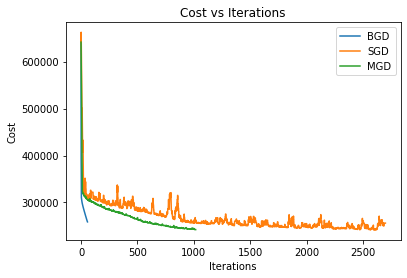

In [8]:
plt.figure()
plt.plot(np.arange(BGD_iterations + 1), BGD_cost, label = 'BGD')
plt.plot(np.arange(SGD_iterations + 1), SGD_cost, label = 'SGD')
plt.plot(np.arange(MGD_iterations + 1), MGD_cost, label = 'MGD')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.legend()
plt.savefig('q1.png')
plt.show()